# Summary Statistics
Exploring the NYC Building Elevation and Subgrade (BES) Dataset in Python

Author: Mark Bauer

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, HTML
import duckdb

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,duckdb

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas    : 1.5.1
matplotlib: 3.6.2
seaborn   : 0.12.1
duckdb    : 1.0.0



![cover-photo](images/dataset-cover-photo.png)
Screenshot of dataset on NYC Open Data.

Link to data set website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

# Create Duckdb database instance

In [3]:
# create a DuckDB database instance
con = duckdb.connect()

# examine count of rows
con.sql("SELECT COUNT(*) AS count_rows FROM read_parquet('data/bes-data.parquet')").show()

┌────────────┐
│ count_rows │
│   int64    │
├────────────┤
│     861876 │
└────────────┘



# Load data and convert to pandas dataframe

In [4]:
# convert duckdb table to a dataframe
df = con.sql("SELECT * FROM read_parquet('data/bes-data.parquet')").df()

rows, cols = df.shape
print('rows: {:,}\ncolumns: {}'.format(rows, cols))

# preview data
df.head()

rows: 861,876
columns: 26


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861876 entries, 0 to 861875
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   the_geom    861876 non-null  object 
 1   bin         861876 non-null  int64  
 2   bbl         861876 non-null  int64  
 3   borough     861875 non-null  float64
 4   block       861875 non-null  float64
 5   lot         861876 non-null  int64  
 6   address     844875 non-null  object 
 7   z_grade     861876 non-null  float64
 8   z_floor     861876 non-null  float64
 9   subgrade    861876 non-null  object 
 10  notes1      861876 non-null  object 
 11  notes2      202458 non-null  object 
 12  notes3      472003 non-null  object 
 13  x           861876 non-null  float64
 14  y           861876 non-null  float64
 15  latitude    861876 non-null  float64
 16  longitude   861876 non-null  float64
 17  pluto_bbl   861876 non-null  int64  
 18  Council     861876 non-null  int64  
 19  Bo

In [6]:
df.isnull().sum().sort_values(ascending=False)

notes2        659418
notes3        389873
address        17001
borough            1
block              1
the_geom           0
longitude          0
CDTA2020           0
NTAName            0
NTA2020            0
BoroCT2020         0
CTLabel            0
BoroCD             0
Council            0
pluto_bbl          0
x                  0
latitude           0
y                  0
bin                0
notes1             0
subgrade           0
z_floor            0
z_grade            0
lot                0
bbl                0
CDTAName           0
dtype: int64

# Brief Data Cleaning

In [7]:
df.loc[df['borough'].isnull()]

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
321489,POINT (-73.9620098031315 40.68086547750051),3425737,3020180057,NaN,NaN,0,None,82.725,82.803,N,...,-73.96201,3020180057,35,302,201.0,3020100,BK0204,Clinton Hill,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...


In [8]:
# fill in null value for borough, this is in Brooklyn
df.loc[df['bin'] == 3425737, 'borough'] = 3.0

df.loc[df['borough'].isnull()]

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName


In [9]:
# cast column type to int
df['borough'] = df['borough'].astype(int)

df['borough'].head()

0    5
1    5
2    5
3    5
4    5
Name: borough, dtype: int64

# Examining Building Elevation Features and Measurements

`z_grade`: The elevation of the building at it's lowest adjacent grade - the lowest point where the building touches the ground.

`z_floor`: The elevation of what is estimated to be the lowest actively used floor.

Source: Definitions from the data dictionary.

In [10]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,861876.000000,861876.000000
mean,53.915012,58.113704
std,42.192895,42.560673
min,-13.096000,0.000000
25%,23.304000,27.438000
50%,44.328000,48.370000
75%,72.709250,77.063000
max,402.839000,404.397000


Check for values below zero.

In [11]:
counts = (
    df
    .loc[df['z_grade'] < 0]
    .shape[0]
)

print(f"count of properties where z_grade value < 0: {counts:,}")

count of properties where z_grade value < 0: 11


In [12]:
counts = (
    df
    .loc[df['z_floor'] < 0]
    .shape[0]
)

print(f"count of properties where z_floor value < 0: {counts:,}")

count of properties where z_floor value < 0: 0


Check for values equal to zero.

In [13]:
counts = (
    df
    .loc[df['z_grade'] == 0]
    .shape[0]
)

print(f"count of properties where z_grade is 0 (no measurement): {counts:,}")

count of properties where z_grade is 0 (no measurement): 14,039


In [14]:
counts = (
    df
    .loc[df['z_floor'] == 0]
    .shape[0]
)

print(f"count of properties where z_floor is 0 (no measurement): {counts:,}")

count of properties where z_floor is 0 (no measurement): 14,038


In [15]:
bin_id = (
    df
    .loc[(df['z_grade'] == 0) & (df['z_floor'] != 0), 'bin']
    .values[0]
)

df.loc[df['bin'] == bin_id, ['bin', 'z_grade', 'z_floor', 'notes1']]

,bin,z_grade,z_floor,notes1
293514,3109155,0.0,42.929,Property was Successfully Measured


There is one building that doesn't reconcile. We can leave this record in for now even with the presense of zero, but it might be worth examining in the future. The `notes1` confirms that this property was successfully measured. 

Let's drop all records where `z_floor` is zero.

In [16]:
# sanity check before dropping z_floor is zero
(df
 .loc[df['z_floor'] == 0, 'notes1']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'notes1', 'notes1':'count'})
)

,notes1,count
0,Property not Visible from Street; No Address P...,12079
1,Vacant Lot; No Address Plate or Identification...,1957
2,Property not Visible from Street; No Address P...,1
3,Property not Visible Due to Construction or Ob...,1


Most properties with `z_floor` as zero were either not visible from street or a vacant lot.

In [17]:
# drop all records where z_floor is zero
df = (
    df
    .loc[df['z_floor'] != 0]
    .reset_index(drop=True)
)

print(f"new shape of data: {df.shape}")
df.head()

new shape of data: (847838, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [18]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,847838.000000,847838.000000
mean,54.807705,59.075916
std,41.961769,42.244047
min,-13.096000,0.703000
25%,24.227250,28.361000
50%,45.095000,49.224000
75%,73.342750,77.704750
max,402.839000,404.397000


In [19]:
df['notes1'].value_counts(normalize=True)

Property was Successfully Measured                                                                                                      0.762860
Property not Visible Due to Construction or Obstruction                                                                                 0.135969
Property was Successfully Measured; No Address Plate or Identification on Building                                                      0.072616
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                 0.020207
Property was Successfully Measured; Property Under Construction                                                                         0.003475
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building; Property Under Construction    0.001977
Property not Visible Due to Construction or Obstruction; Property Under Construction                                              

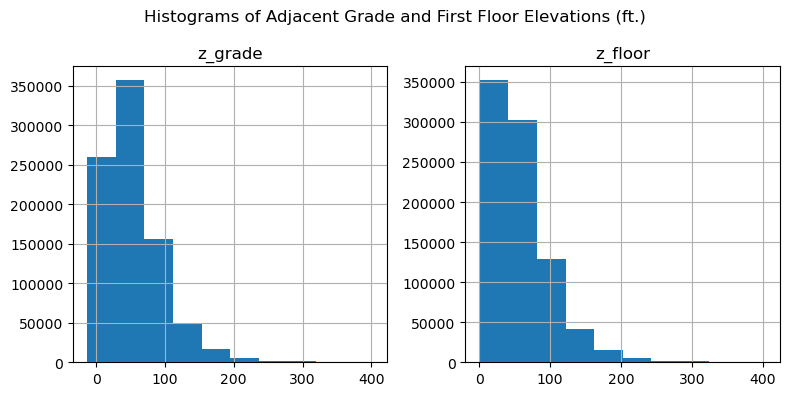

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of Adjacent Grade and First Floor Elevations (ft.)', fontsize=12)
plt.tight_layout()

**Figure xx:** Histograms of z_grade and z_floor values (ft.).

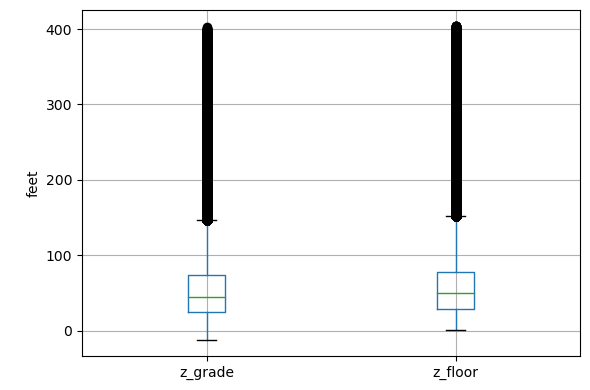

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))

df.boxplot(column=['z_grade', 'z_floor'])

plt.ylabel('\nfeet')
plt.tight_layout()

**Figure xx:** Boxplots of z_grade and z_floor values (ft.).

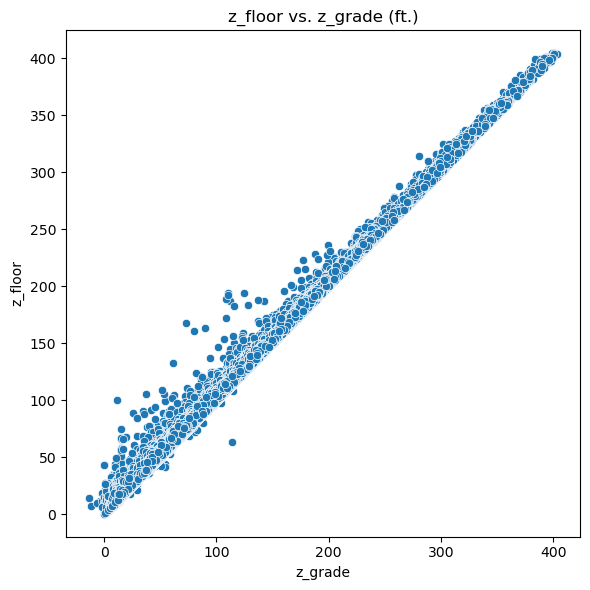

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    x=df['z_grade'],
    y=df['z_floor'],
    ax=ax
)

plt.title('z_floor vs. z_grade (ft.)')
plt.tight_layout()

**Figure xx:** Scatterplot of z_floor vs. z_grade values (ft.).

Interesting to see one building that breaks from the rest to the right of the line. Let's examine.

In [23]:
(df
 .loc[
     (df['z_grade'] > 100)
     & (df['z_floor'] < 70)]
 .iloc[:, :-9]
)

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,notes1,notes2,notes3,x,y,latitude,longitude
581783,POINT (-73.90546567085973 40.708900200415925),4434111,4033730056,4,3373.0,56,2115 GROVE STREET,113.93,63.443,N,Property was Successfully Measured; No Address...,"Commercial, Industrial or other Non-Residentia...",None,1.010459e+06,197562.090818,40.7089,-73.905466


More review is required, but this might be a measurement error. We can leave this in for now.

Examine `z_grade` > `z_floor`.

In [24]:
counts = (
    df
    .loc[df['z_floor'] < df['z_grade']]
    .shape[0]
)

print(f"count of properties where z_floor is less than z_grade and z_floor is not zero: {counts:,}")

count of properties where z_floor is less than z_grade and z_floor is not zero: 316


There are 316 properties that seem to not be considered a first *occupied* floor. Let's check the notes.

In [25]:
# examine scenario
(df
 .loc[df['z_grade'] > df['z_floor'], ['notes1']]
 .value_counts()
)

notes1                                                                                                                              
Property was Successfully Measured                                                                                                      246
Property was Successfully Measured; No Address Plate or Identification on Building                                                       34
Property not Visible Due to Construction or Obstruction                                                                                  13
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  10
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building; Property Under Construction      5
Property not Visible Due to Construction or Obstruction; Property Under Construction                                                      3
Property was Successfully M

We can leave these in, but they might not be considered a first *occupied* floor.

## Calculate First Floor Height
First Floor Height is calculated from Lowest Adjacent Grade Elevation to First Floor Elevation.

In [26]:
# height from building floor to grade
df['first_floor_height'] = df['z_floor'] - df['z_grade']

# summary stats of first floor heights
df['first_floor_height'].describe()

count    847838.000000
mean          4.268211
std           3.087679
min         -50.487000
25%           2.015000
50%           3.627000
75%           6.571000
max          94.440000
Name: first_floor_height, dtype: float64

In [27]:
# count of first_floor_height is null
df['first_floor_height'].isnull().sum()

0

In [28]:
mean = df['first_floor_height'].mean()
print(f"Mean value of First Floor Height: {mean:.2f} ft.")

median = df['first_floor_height'].median()
print(f"Median value of First Floor Height: {median:.2f} ft.")

Mean value of First Floor Height: 4.27 ft.
Median value of First Floor Height: 3.63 ft.


In [29]:
# average of average neighborhood grade to floor height
mean_nta = (
    df
    .groupby(by=['NTAName'])['first_floor_height']
    .mean()
    .mean()
)

print(f"Mean First Floor Height of means of NTAs: {mean_nta:.2f} ft.")

Mean First Floor Height of means of NTAs: 3.82 ft.


# Visualizing Distributions of First Floor Heights

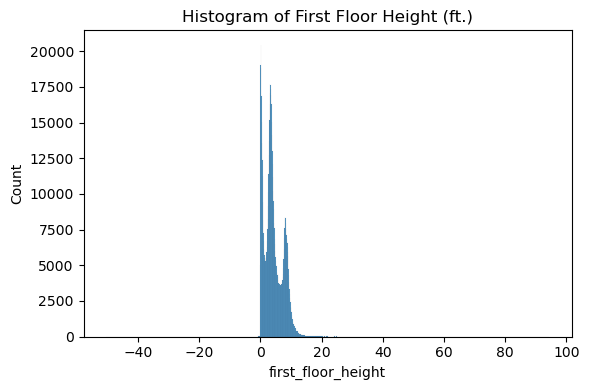

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    df['first_floor_height'],
    ax=ax
)

plt.title('Histogram of First Floor Height (ft.)')
plt.tight_layout()

**Figure xx:** Histogram of building first floor height (ft.). Default Seaborn bin size based on the variance of the data and the number of observations.

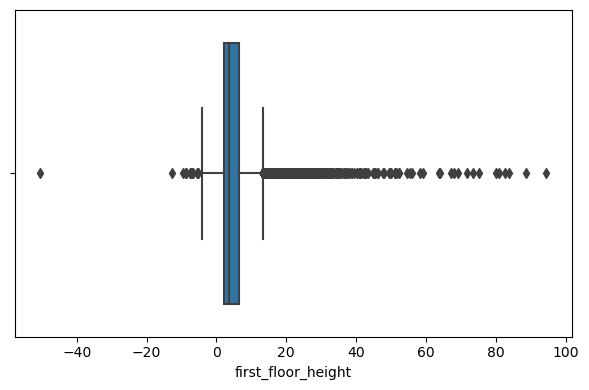

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    x=df["first_floor_height"],
    ax=ax
)

plt.tight_layout()

**Figure xx:** Boxplot of building first floor height (ft.).

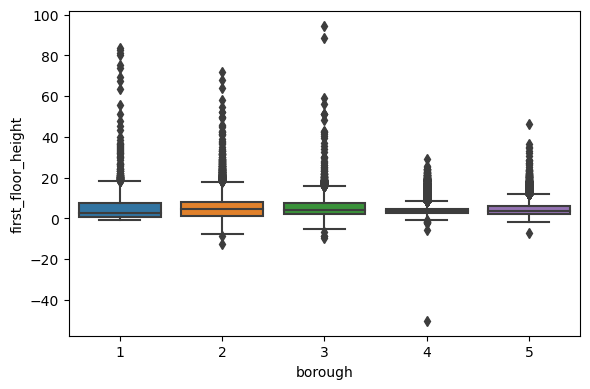

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(
    x=df['borough'],
    y=df["first_floor_height"],
    ax=ax
)

plt.tight_layout()

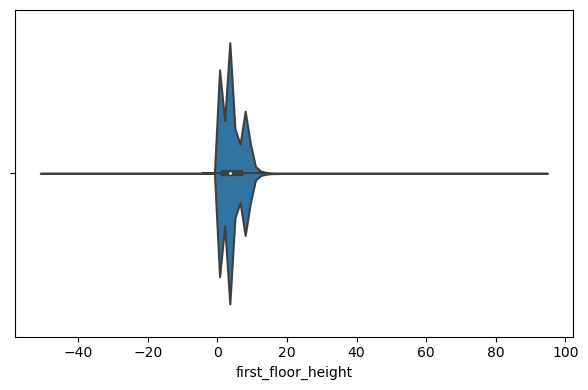

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.violinplot(
    x=df["first_floor_height"],
    ax=ax
)

plt.tight_layout()

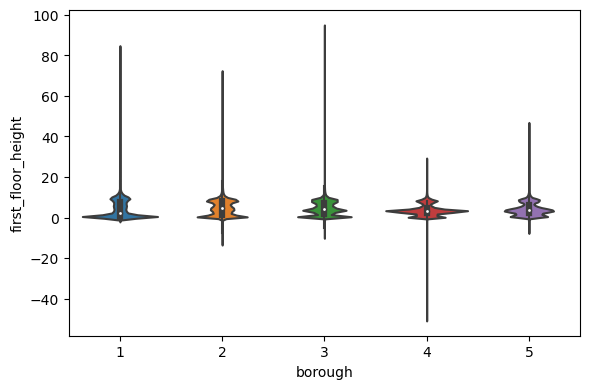

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.violinplot(
    y=df["first_floor_height"],
    x=df['borough'],
    ax=ax
)

plt.tight_layout()

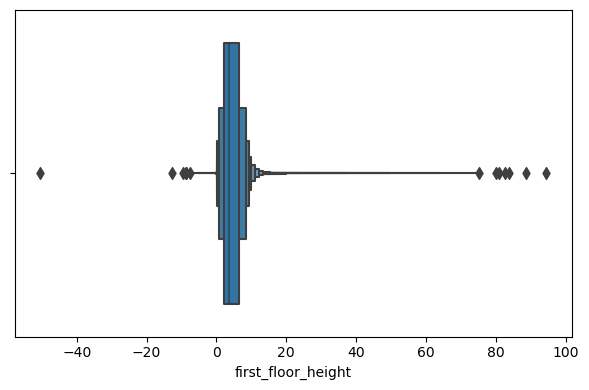

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxenplot(
    x=df["first_floor_height"],
    ax=ax
)

plt.tight_layout()

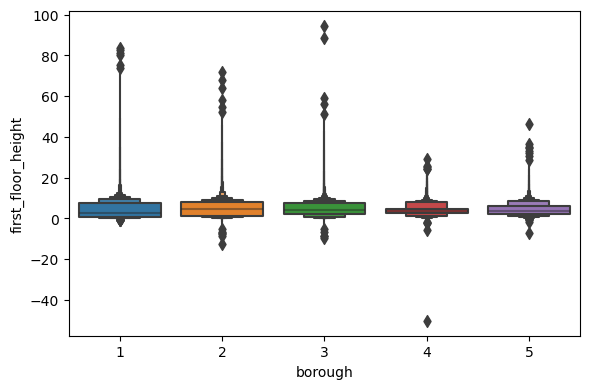

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxenplot(
    y=df["first_floor_height"],
    x=df['borough'],
    ax=ax
)

plt.tight_layout()

Adding Borough column. It's useful to have a full Neighborhood Tabulation Areas (NTA) and Borough column.

In [37]:
# reading in NTA shape, only being used as a df and not gdf
url = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
nta_df = gpd.read_file(url)

print('shape of data: {}'.format(nta_df.shape))
nta_df.head()

shape of data: (262, 12)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry
0,3.0,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.566322,3.532121e+07,"POLYGON ((-73.93213 40.72816, -73.93238 40.727..."
1,3.0,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.027018,2.885431e+07,"POLYGON ((-73.96176 40.72523, -73.96154 40.725..."
2,3.0,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.280262,1.520896e+07,"POLYGON ((-73.95024 40.70547, -73.94984 40.705..."
3,3.0,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773087,5.226621e+07,"POLYGON ((-73.92406 40.71411, -73.92404 40.714..."
4,3.0,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.504867,9.982322e+06,"POLYGON ((-73.99236 40.68969, -73.99436 40.690..."


In [38]:
# reading in NTA shape
url = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
gdf = gpd.read_file(url)

# convert crs to 2263
gdf = gdf.to_crs(2263)

gdf['ntaname_boro'] = gdf['ntaname'] + ', ' + gdf['boroname']

print('shape of data:', gdf.shape)
gdf.head()

shape of data: (262, 13)


,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,ntaname_boro
0,3.0,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.566322,3.532121e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...","Greenpoint, Brooklyn"
1,3.0,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.027018,2.885431e+07,"POLYGON ((994849.011 203499.267, 994911.093 20...","Williamsburg, Brooklyn"
2,3.0,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.280262,1.520896e+07,"POLYGON ((998047.210 196303.325, 998157.901 19...","South Williamsburg, Brooklyn"
3,3.0,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773087,5.226621e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...","East Williamsburg, Brooklyn"
4,3.0,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.504867,9.982322e+06,"POLYGON ((986367.735 190549.239, 985813.835 19...","Brooklyn Heights, Brooklyn"


In [39]:
# merge and retrieve nta and boro name data
nta_df = nta_df.loc[:, ['nta2020', 'boroname']]

df = df.merge(
    nta_df,
    left_on='NTA2020',
    right_on='nta2020',
    how='left'
)

df['ntaname_boro'] = df['NTAName'] + ', ' + df['boroname']

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (847838, 30)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName,first_floor_height,nta2020,boroname,ntaname_boro
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation),2.904,SI0304,Staten Island,"Annadale-Huguenot-Prince's Bay-Woodrow, Staten..."
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation),1.337,SI0305,Staten Island,"Tottenville-Charleston, Staten Island"
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation),2.730,SI0305,Staten Island,"Tottenville-Charleston, Staten Island"
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation),2.562,SI0305,Staten Island,"Tottenville-Charleston, Staten Island"
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation),4.215,SI0305,Staten Island,"Tottenville-Charleston, Staten Island"


In [40]:
# total counts by NTA
nta_counts = (
    df
    .groupby(by=['nta2020'])['bin']
    .count()
    .rename('count')
    .reset_index()
)

# counts that were measured successfully by NTA
nta_counts_measured = (
    df
    .loc[df['notes1'] == 'Property was Successfully Measured']
    .groupby(by=['ntaname_boro', 'nta2020'])['bin']
    .count()
    .rename('count_measured')
    .reset_index()
)

# merge both counts and count measured dataframes
nta_counts_merged = nta_counts.merge(
    nta_counts_measured,
    on='nta2020',
    how='left'
)

# examine data
print('shape of data: {}'.format(nta_counts_measured.shape))
nta_counts_merged.head()

shape of data: (237, 3)


,nta2020,count,ntaname_boro,count_measured
0,BK0101,4815,"Greenpoint, Brooklyn",2886.0
1,BK0102,3387,"Williamsburg, Brooklyn",2339.0
2,BK0103,2057,"South Williamsburg, Brooklyn",1161.0
3,BK0104,4422,"East Williamsburg, Brooklyn",3089.0
4,BK0201,1432,"Brooklyn Heights, Brooklyn",553.0


In [41]:
# Keep Stuyvesant Town-Peter Cooper Village, Manhattan - MN0601
nta_exclude = (
    nta_counts_merged
    .loc[(nta_counts_merged['count'] < 300)
            & (~nta_counts_merged['nta2020'].isin(['MN0601'])),
         'nta2020']
    .values
)

nta_exclude

array(['BK0261', 'BK0471', 'BK0571', 'BK0771', 'BK0891', 'BK1061',
       'BK1091', 'BK1771', 'BK1891', 'BK1892', 'BK1893', 'BK5591',
       'BK5691', 'BK5693', 'BX0391', 'BX0491', 'BX0492', 'BX0991',
       'BX1091', 'BX1161', 'BX1271', 'BX2691', 'BX2791', 'BX2891',
       'MN0191', 'MN1191', 'MN1291', 'MN1292', 'MN6491', 'QN0161',
       'QN0171', 'QN0191', 'QN0261', 'QN0271', 'QN0571', 'QN0572',
       'QN0573', 'QN0574', 'QN0761', 'QN0791', 'QN0871', 'QN0891',
       'QN1191', 'QN1371', 'QN1491', 'QN8081', 'QN8191', 'QN8291',
       'QN8381', 'QN8491', 'QN8492', 'SI0191', 'SI0291', 'SI0391',
       'SI9561', 'SI9592', 'SI9593'], dtype=object)

In [42]:
# mean grade to floor height by NTA
nta_mean = (
    df
    .groupby(by='ntaname_boro')['first_floor_height']
    .describe()
    .reset_index()
)

# preview count measured dataframe
nta_mean.head()

,ntaname_boro,count,mean,std,min,25%,50%,75%,max
0,"Allerton, Bronx",1648.0,5.098075,3.770589,0.010,1.01925,5.0685,8.530,18.505
1,"Alley Pond Park, Queens",2.0,2.664000,3.176324,0.418,1.54100,2.6640,3.787,4.910
2,"Annadale-Huguenot-Prince's Bay-Woodrow, Staten...",11167.0,4.735034,3.072637,0.001,2.36050,4.0560,7.778,18.400
3,"Arden Heights-Rossville, Staten Island",9024.0,3.823133,3.187088,0.000,1.11700,2.9030,6.165,20.415
4,"Astoria (Central), Queens",4250.0,4.041902,3.150262,0.001,0.85950,3.6930,6.572,15.774


In [43]:
# merge dataframes to map
nta_mean_merged = gdf.merge(
    nta_mean,
    on='ntaname_boro',
    how='left'
)

# fill na with merge
nta_mean_merged['count'] = nta_mean_merged['count'].fillna(0).astype(int)
nta_mean_merged['mean'] = nta_mean_merged['mean'].round(2)

# preview
nta_mean_merged.iloc[:, -9:].head()

,ntaname_boro,count,mean,std,min,25%,50%,75%,max
0,"Greenpoint, Brooklyn",4815,3.30,2.951855,-0.244,0.64750,2.6210,5.53600,18.832
1,"Williamsburg, Brooklyn",3387,2.45,2.981632,-0.436,0.38500,1.0120,3.52350,18.596
2,"South Williamsburg, Brooklyn",2057,5.20,4.177141,-9.634,0.95400,4.5780,8.87500,22.246
3,"East Williamsburg, Brooklyn",4422,2.34,2.677036,0.000,0.41225,1.1275,3.24150,16.861
4,"Brooklyn Heights, Brooklyn",1432,6.18,4.065258,0.011,1.35350,7.7235,9.36425,28.288


In [44]:
# table of percent measured in ascending order by NTA
(nta_mean_merged
 .sort_values(by='mean')
 .loc[:, ['ntaname_boro', 'count', 'mean']]
 .head(20)
 .reset_index(drop=True)
)

,ntaname_boro,count,mean
0,"Shirley Chisholm State Park, Brooklyn",1,0.16
1,"Rockaway Community Park, Queens",2,0.36
2,"Dyker Beach Park, Brooklyn",5,0.42
3,"Cunningham Park, Queens",8,0.43
4,"Lincoln Terrace Park, Brooklyn",1,0.53
5,"Holy Cross Cemetery, Brooklyn",1,0.57
6,"McGuire Fields, Brooklyn",3,0.74
7,"Montefiore Cemetery, Queens",1,0.91
8,"Barren Island-Floyd Bennett Field, Brooklyn",17,0.96
9,"Soundview Park, Bronx",2,1.05


**Table xx:** Top 20 Neighborhood Tabulations Areas (NTA) by lowest average first floor height.

In [45]:
# table of percent measured in ascending order by NTA
(nta_mean_merged
 .loc[~nta_mean_merged['nta2020'].isin(nta_exclude)]
 .sort_values(by='mean')
 .loc[:, ['ntaname_boro', 'count', 'mean']]
 .head(20)
 .reset_index(drop=True)
)

,ntaname_boro,count,mean
0,"Midtown-Times Square, Manhattan",1434,1.20
1,"Midtown South-Flatiron-Union Square, Manhattan",1281,1.21
2,"Tribeca-Civic Center, Manhattan",875,1.45
3,"SoHo-Little Italy-Hudson Square, Manhattan",1606,1.81
4,"Lower East Side, Manhattan",977,1.92
5,"Financial District-Battery Park City, Manhattan",571,1.96
6,"East Williamsburg, Brooklyn",4422,2.34
7,"Williamsburg, Brooklyn",3387,2.45
8,"Chinatown-Two Bridges, Manhattan",1052,2.50
9,"Coney Island-Sea Gate, Brooklyn",2727,2.61


**Table xx:** Top 20 Neighborhood Tabulations Areas (NTA) by lowest average first floor height (removing parks and cemetaries).

In [46]:
# table of percent measured in descending order by NTA
(nta_mean_merged
 .loc[~nta_mean_merged['nta2020'].isin(nta_exclude)]
 .sort_values(by='mean', ascending=False)
 .loc[:, ['ntaname_boro', 'count', 'mean']]
 .head(20)
 .reset_index(drop=True)
)

,ntaname_boro,count,mean
0,"Hamilton Heights-Sugar Hill, Manhattan",1603,7.00
1,"Upper West Side (Central), Manhattan",2720,6.66
2,"Kingsbridge Heights-Van Cortlandt Village, Bronx",995,6.58
3,"Park Slope, Brooklyn",6704,6.33
4,"Riverdale-Spuyten Duyvil, Bronx",2691,6.20
5,"Harlem (South), Manhattan",1945,6.18
6,"Brooklyn Heights, Brooklyn",1432,6.18
7,"Washington Heights (South), Manhattan",1203,6.15
8,"Washington Heights (North), Manhattan",957,6.08
9,"Bedford-Stuyvesant (East), Brooklyn",8905,6.02


**Table xx:** Top 20 Neighborhood Tabulations Areas (NTA) by heighest average first floor height.

In [47]:
# summary statistics
(nta_mean_merged
 .loc[~nta_mean_merged['nta2020'].isin(nta_exclude), 'mean']
 .describe()
)

count    197.000000
mean       4.250812
std        1.025146
min        1.200000
25%        3.580000
50%        4.270000
75%        4.860000
max        7.000000
Name: mean, dtype: float64

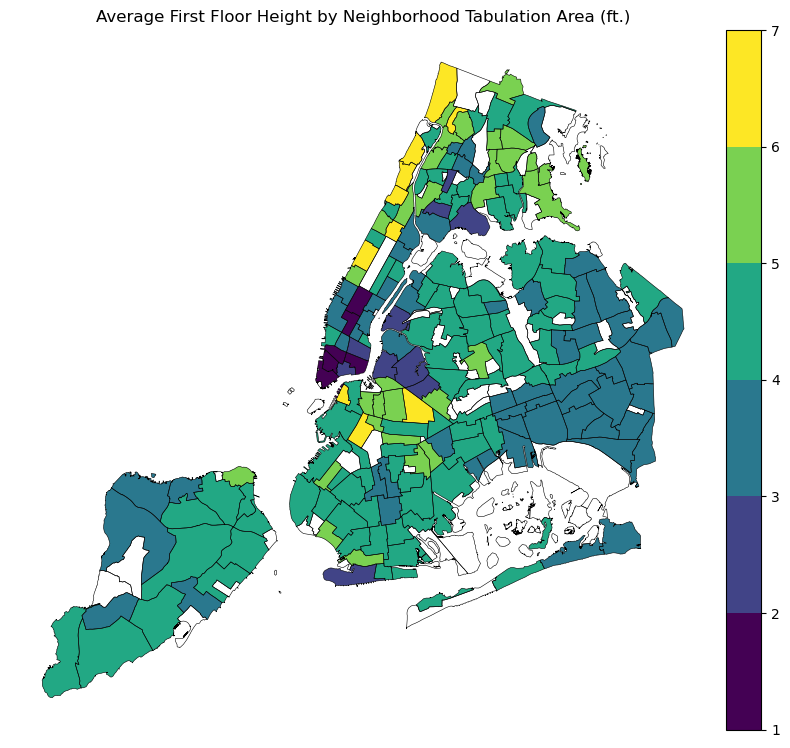

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm([1, 2, 3, 4, 5, 6, 7], cmap.N)

(nta_mean_merged
 .loc[~nta_mean_merged['nta2020'].isin(nta_exclude)]
 .plot(
    column='mean',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax)
)

gdf.plot(ax=ax, facecolor='None', linewidth=.4)

ax.set_title('Average First Floor Height by Neighborhood Tabulation Area (ft.)', fontsize=12)
ax.axis('off')
plt.tight_layout()
plt.savefig('figures/grade-floor-mean.png', dpi=250, bbox_inches='tight')

**Figure xx:** Average First Floor Height by Neighborhood Tabulation Area (NTA).

# Examining Subgrade Values

Subgrade spaces  
> As noted in the data dictionary, a subgrade space does not need to be habitable or show residential use to be recorded – this dataset cannot speak to whether recorded subgrade spaces are being used as residences. The z_grade measurement in buildings with subgrade space is not the same as the depth of the subgrade space – there is no way of knowing that measurement from outside of the building. The methodology relies on there being external clues that indicate subgrade space. It does not represent subgrade spaces that may only be internally accessible, such as cellars that may be present in large commercial or apartment buildings. **This dataset should not be treated as an inventory of subgrade spaces in New York City.**

Source: Building_Elevation_and_Subgrade_Dataset_Guidance.pdf

This dataset should not be treated as an inventory of subgrade spaces in New York City. The analysis below is purely exploratory.

Examine Notes 2 and 3.

In [49]:
df.loc[:, ['notes2', 'notes3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847838 entries, 0 to 847837
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   notes2  188421 non-null  object
 1   notes3  472002 non-null  object
dtypes: object(2)
memory usage: 19.4+ MB


In [50]:
# notes2
with pd.option_context('display.max_colwidth', 220):

    notes2_df = (
        df
        .groupby(by='notes2')['first_floor_height']
        .mean()
        .rename('first_floor_height_avg')
        .round(2)
        .reset_index()
        .sort_values(by='first_floor_height_avg', ascending=False)
        .reset_index(drop=True)
    )
    
    display(HTML(notes2_df.to_html()))

,notes2,first_floor_height_avg
0,Attached Garage to Living Space; Partially Enclosed or Unenclosed Ground Floor for Parking or Access,7.98
1,Partially Enclosed or Unenclosed Ground Floor for Parking or Access,6.53
2,"Attached Garage to Living Space; Fully Enclosed Ground floor for Apartment Lobby, Parking, or Access (includes sites with visible flood vents)",6.11
3,"Fully Enclosed Ground floor for Apartment Lobby, Parking, or Access (includes sites with visible flood vents)",5.46
4,Attached Garage to Living Space,4.88
5,"Commercial, Industrial or other Non-Residential Lowest Floor Active Use; Partially Enclosed or Unenclosed Ground Floor for Parking or Access",4.19
6,"Commercial, Industrial or other Non-Residential Lowest Floor Active Use; Fully Enclosed Ground floor for Apartment Lobby, Parking, or Access (includes sites with visible flood vents)",2.52
7,"Commercial, Industrial or other Non-Residential Lowest Floor Active Use",1.43
8,"Commercial, Industrial or other Non-Residential Lowest Floor Active Use; Attached Garage to Living Space",0.84


**Table xx:** Mean First Floor Height by Floor Attributes (Notes 2).

In [51]:
# notes 3
with pd.option_context('display.max_colwidth', 220):
    
    notes3_df = (
        df
        .groupby(by='notes3')['first_floor_height']
        .mean()
        .rename('first_floor_height_avg')
        .round(2)
        .reset_index()
        .sort_values(by='first_floor_height_avg', ascending=False)
        .reset_index(drop=True)
    )

    display(HTML(notes3_df.to_html()))

,notes3,first_floor_height_avg
0,Visible Door or Window in subgrade space; Negative grade driveway walkway leading down to subgrade space,7.62
1,Visible Door or Window in subgrade space,4.28


**Table xx:** Mean First Floor Height by Subgrade Space Attributes (Notes 3).